MSE: 4586505886.68125


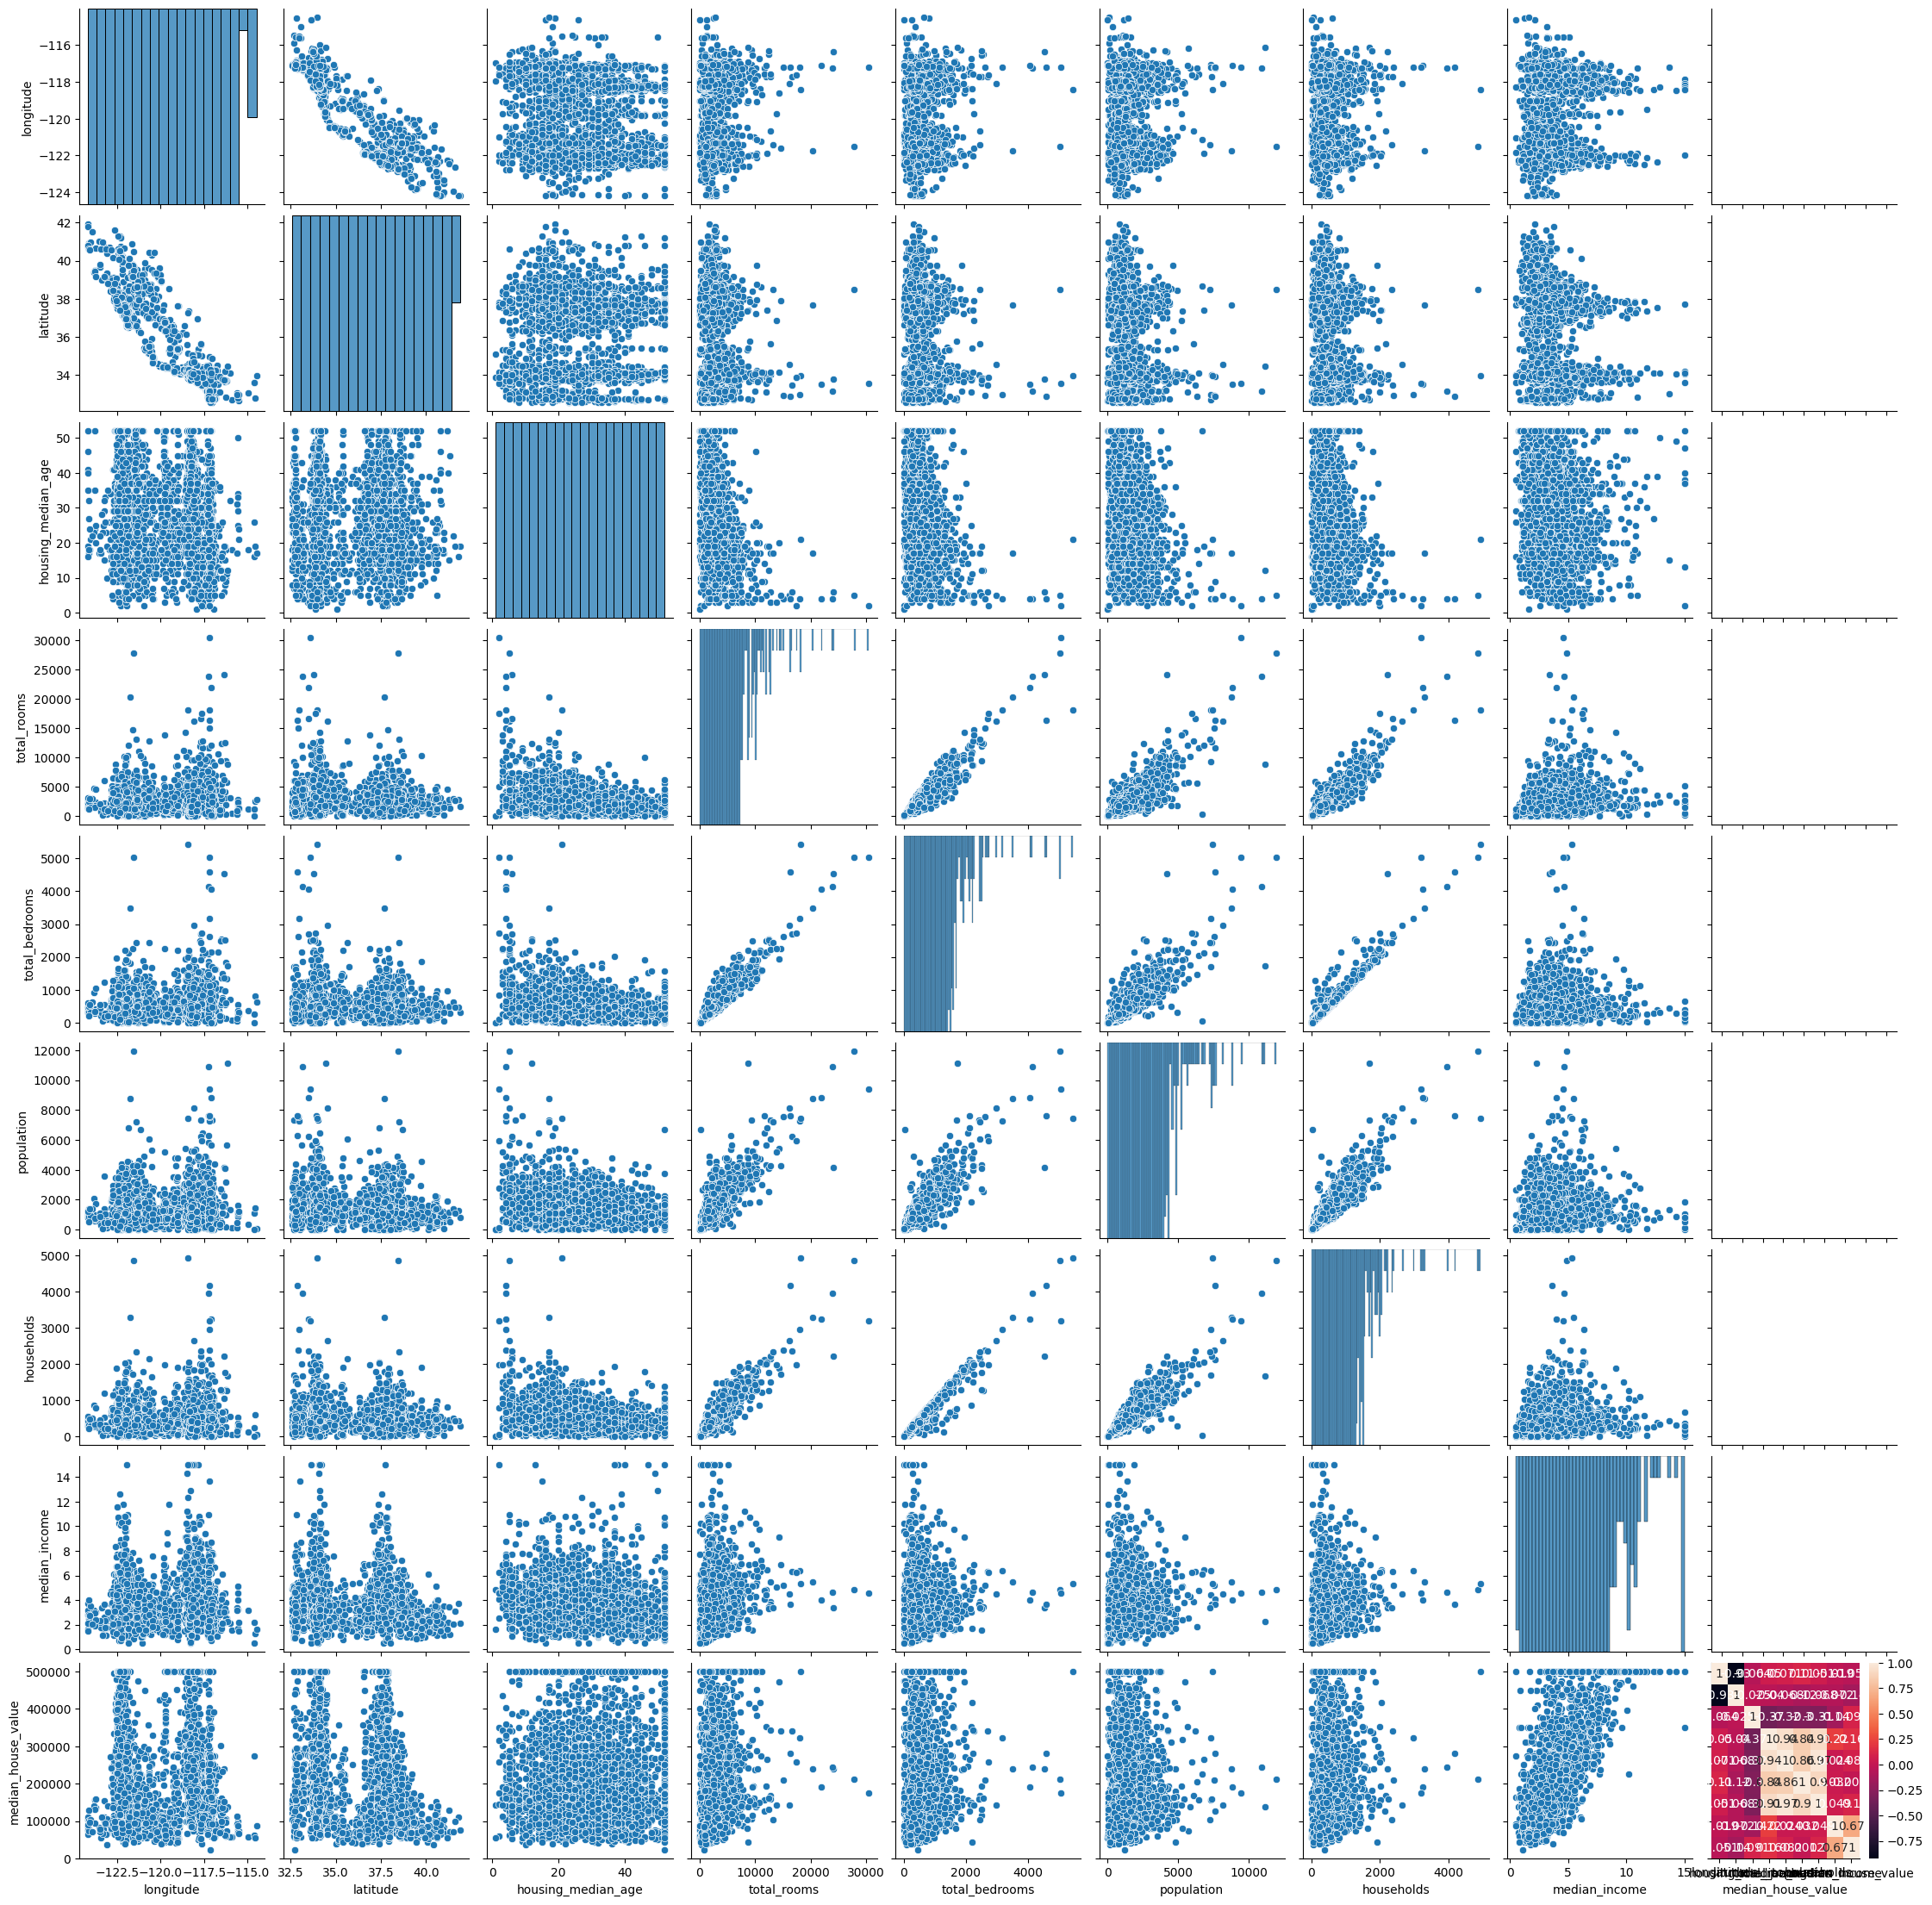

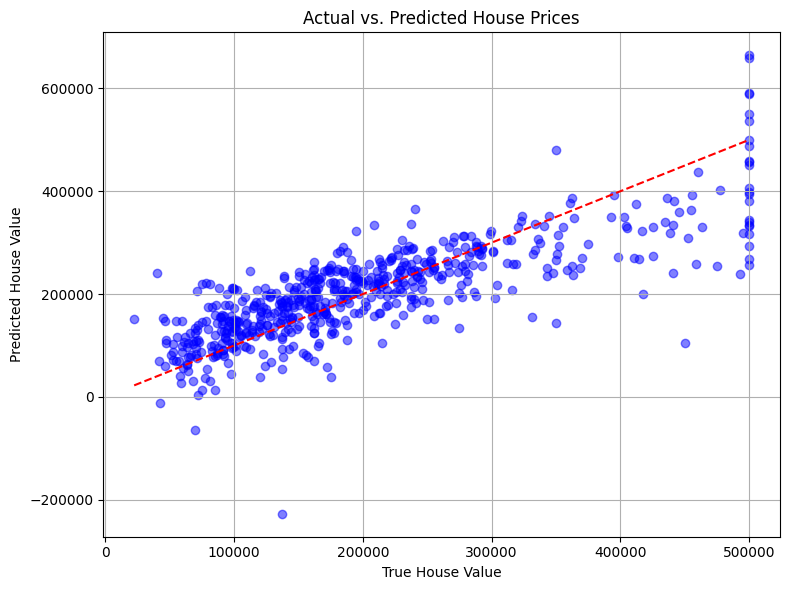

In [5]:
# Basic imports
import pandas as pd #working with data tables (DataFrames)
import numpy as np #numerical tools
import matplotlib.pyplot as plt # plotting and visualizing data
import seaborn as sns

df = pd.read_csv('sample_data/california_housing_test.csv')#load California housing data
df.head()

df.isnull().sum()# Check for missing values

df = df.dropna()  # Fill or drop missing values, or use df.fillna()

sns.pairplot(df) #shows relationships between all pairs of features
sns.heatmap(df.corr(), annot=True) #shows how strongly each feature correlates with others.
#Build a Machine Learning Model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: predict 'median_house_value'
X = df.drop('median_house_value', axis=1) # X includes all features except the target.
y = df['median_house_value'] # y is what you want to predict (house prices).
#Split Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #You divide the data into: Training set (80%) → used to teach the model, Testing set (20%) → used to evaluate performance
# random_state=42 ensures the same random split every time (reproducibility)

#Train the Model:
model = LinearRegression()#create a Linear Regression model.
model.fit(X_train, y_train)#fit() = training: it learns the best line to predict prices based on your features.

predictions = model.predict(X_test) #model now tries to predict house prices on new, unseen data.
#Evaluate Performance
print("MSE:", mean_squared_error(y_test, predictions))#MSE = Mean Squared Error = average of squared differences between predicted and actual prices, Lower MSE = better performance.
#Interpret and visualize results:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')#plots your predicted vs. actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("True House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

